# Notebook ICD - 10

## From scratch to scikit-learn

Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax

Load the dataset and separate input and Target variables

In [2]:
data = pd.read_csv('data_for_lr.csv')
 
# Drop the missing values
data = data.dropna()
 
# training dataset and labels
train_input = np.array(data.x[0:500]).reshape(500,1)
train_output  = np.array(data.y[0:500]).reshape(500,1)
 
# valid dataset and labels
test_input = np.array(data.x[500:700]).reshape(199,1)
test_output  = np.array(data.y[500:700]).reshape(199,1)

Build the Linear Regression Model

In [3]:
class LinearRegression:
	def __init__(self):
		self.parameters = {}
	
	def forward_propagation(self, train_input):
		m = self.parameters['m']
		c = self.parameters['c']
		predictions = np.multiply(m, train_input) + c
		return predictions

	def cost_function(self, predictions, train_output):
		cost = np.mean((train_output - predictions) ** 2)
		return cost

	def backward_propagation(self, train_input, train_output, predictions):
		derivatives = {}
		df = (train_output - predictions) * -1
		dm = np.mean(np.multiply(train_input, df))
		dc = np.mean(df)
		derivatives['dm'] = dm
		derivatives['dc'] = dc
		return derivatives

	def update_parameters(self, derivatives, learning_rate):
		self.parameters['m'] = self.parameters['m'] - learning_rate * derivatives['dm']
		self.parameters['c'] = self.parameters['c'] - learning_rate * derivatives['dc']

	def train(self, train_input, train_output, learning_rate, iters):
		#initialize random parameters
		self.parameters['m'] = np.random.uniform(0,1) * -1
		self.parameters['c'] = np.random.uniform(0,1) * -1
		
		#initialize loss
		self.loss = []
		
		#iterate
		for i in range(iters):
			#forward propagation
			predictions = self.forward_propagation(train_input)

			#cost function
			cost = self.cost_function(predictions, train_output)

			#append loss and print
			self.loss.append(cost)
			print("Iteration = {}, Loss = {}".format(i+1, cost))

			#back propagation
			derivatives = self.backward_propagation(train_input, train_output, predictions)

			#update parameters
			self.update_parameters(derivatives, learning_rate)

		return self.parameters, self.loss

Train the model

In [4]:
#Example usage
linear_reg = LinearRegression()
parameters, loss = linear_reg.train(train_input, train_output, 0.0001, 20)

Iteration = 1, Loss = 8409.255933325436
Iteration = 2, Loss = 3819.566817940825
Iteration = 3, Loss = 1737.2197822781216
Iteration = 4, Loss = 792.456625420687
Iteration = 5, Loss = 363.8165344120065
Iteration = 6, Loss = 169.34205005809898
Iteration = 7, Loss = 81.10876081495336
Iteration = 8, Loss = 41.07721947070085
Iteration = 9, Loss = 22.914864538433193
Iteration = 10, Loss = 14.674583704509542
Iteration = 11, Loss = 10.935958879116976
Iteration = 12, Loss = 9.239740371029017
Iteration = 13, Loss = 8.470163871369872
Iteration = 14, Loss = 8.121005877336048
Iteration = 15, Loss = 7.96259222499158
Iteration = 16, Loss = 7.8907194917621695
Iteration = 17, Loss = 7.858110469405836
Iteration = 18, Loss = 7.84331543617701
Iteration = 19, Loss = 7.836602629561135
Iteration = 20, Loss = 7.83355673812605


Final Prediction and Plot the regression line

In [5]:
#Prediction on test data
print(parameters['m'])
print(parameters['c'])
y_pred = test_input*parameters['m'] + parameters['c']

1.0034689821317166
-0.438306506379054


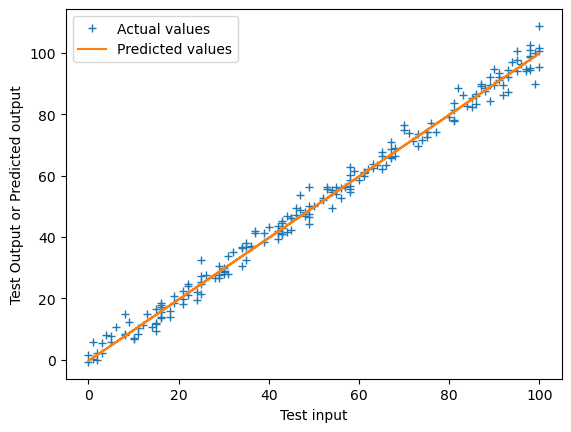

In [6]:
# Plot the regression line with actual data pointa
plt.plot(test_input, test_output, '+', label='Actual values')
plt.plot(test_input, y_pred, label='Predicted values')
plt.xlabel('Test input')
plt.ylabel('Test Output or Predicted output')
plt.legend()
plt.show()

### Using Sklearn

In [7]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(train_input, train_output)
print(reg.score(train_input, train_output))

0.9905959656215136


In [8]:
#Prediction on test data
print(reg.coef_)
print(reg.intercept_)
y_pred = reg.predict(test_input)

[[1.0009993]]
[-0.23603461]


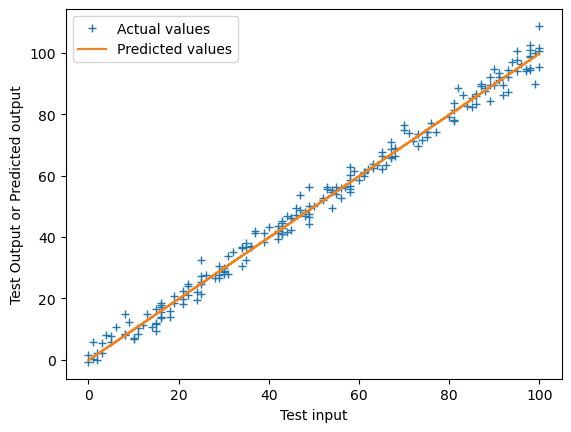

In [9]:
# Plot the regression line with actual data pointa
plt.plot(test_input, test_output, '+', label='Actual values')
plt.plot(test_input, y_pred, label='Predicted values')
plt.xlabel('Test input')
plt.ylabel('Test Output or Predicted output')
plt.legend()
plt.show()

## Comparing algorithms for regression

In [10]:
# Importing libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [11]:
# Load the diabetes dataset from Scikit-learn
diabetes = load_diabetes()

# Convert the data into a pandas DataFrame
data = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
data['target'] = diabetes.target

# Display the first few rows of the dataset
data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


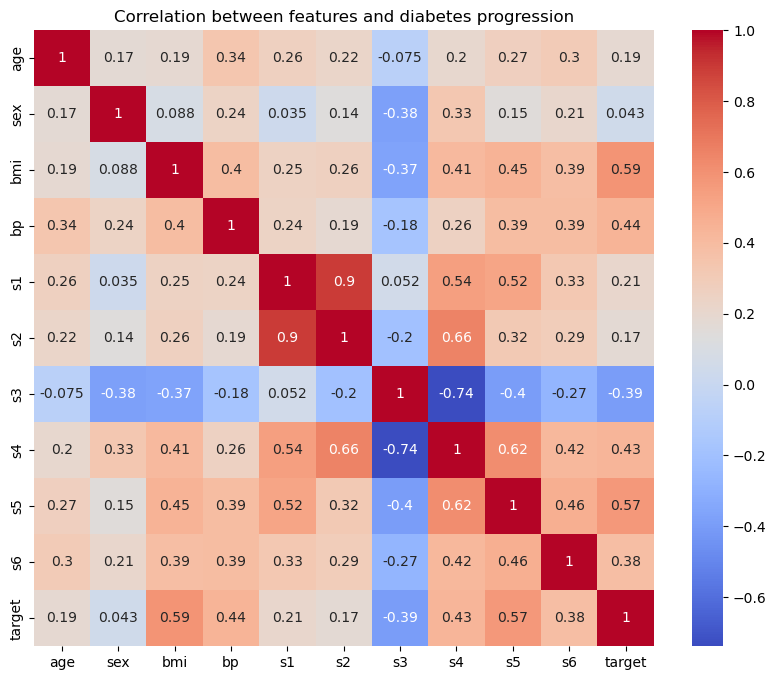

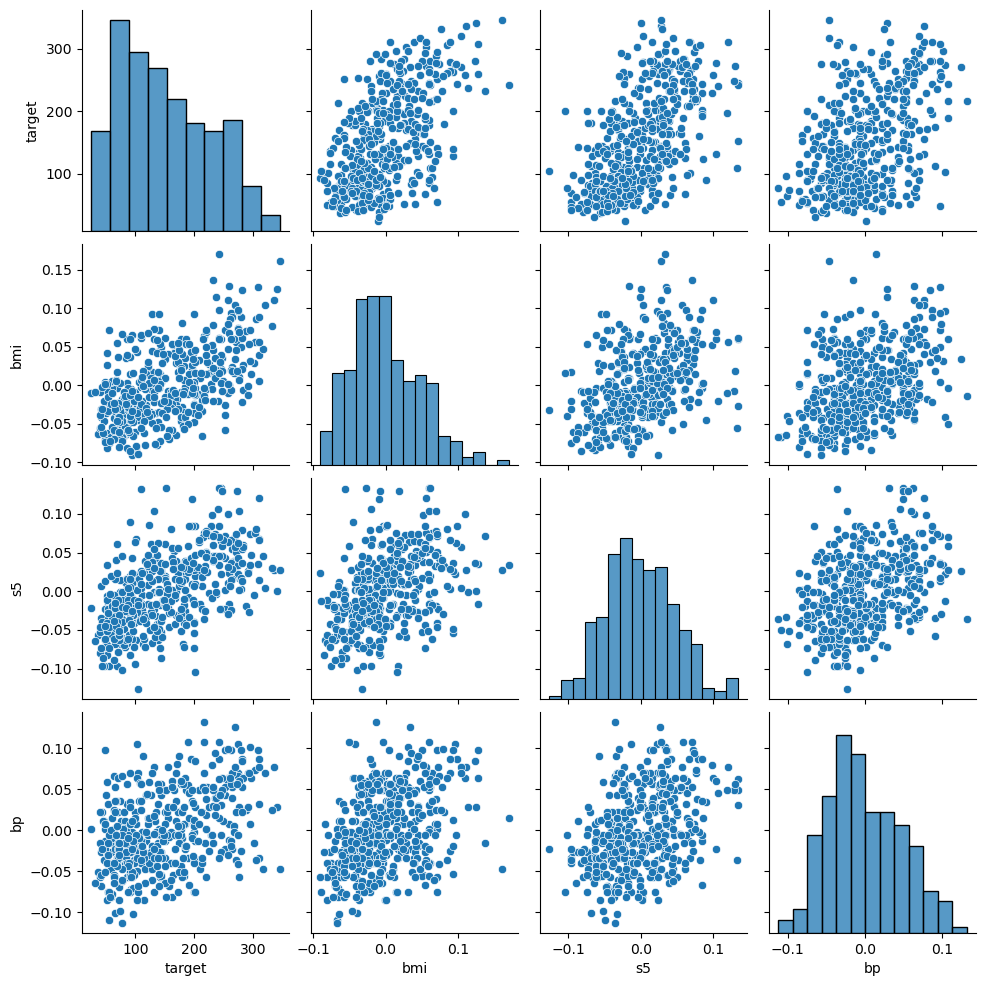

In [12]:
# General dataset information
data.info()

# Descriptive statistics of the dataset
data.describe()

# Heatmap showing the correlation between features and the target variable
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between features and diabetes progression')
plt.show()

# Pairplot to visualize relationships between target and some features
sns.pairplot(data[['target', 'bmi', 's5', 'bp']])
plt.show()

In [13]:
# Splitting data into training and testing sets
X = data.drop('target', axis=1)
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Function to evaluate models and plot predictions
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    print(f'Model: {model_name}')
    print(f'Train R^2: {r2_score(y_train, y_pred_train):.4f}')
    print(f'Test R^2: {r2_score(y_test, y_pred_test):.4f}')
    print(f'Test RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test)):.4f}')
    print('-'*40)
    
    # Plot the predictions vs real values
    plt.figure(figsize=(4, 4))
    plt.scatter(y_test, y_pred_test, label='Predictions', color='blue')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Actual vs Predicted - {model_name}')
    plt.legend()
    plt.show()

Model: Linear Regression
Train R^2: 0.5279
Test R^2: 0.4526
Test RMSE: 53.8534
----------------------------------------


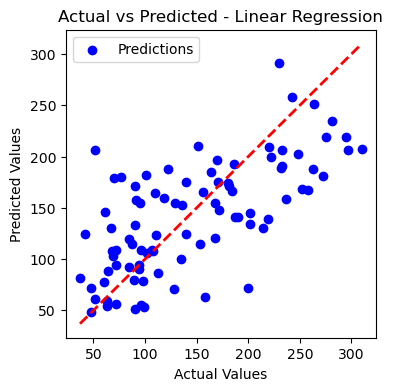

Model: Ridge Regression
Train R^2: 0.4424
Test R^2: 0.4192
Test RMSE: 55.4745
----------------------------------------


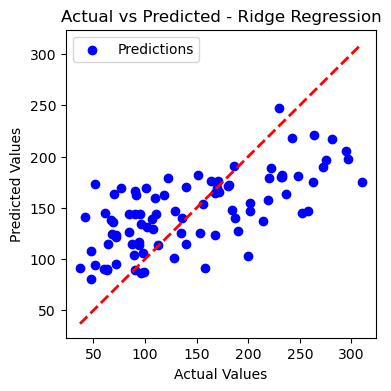

Model: Lasso Regression
Train R^2: 0.5169
Test R^2: 0.4719
Test RMSE: 52.8980
----------------------------------------


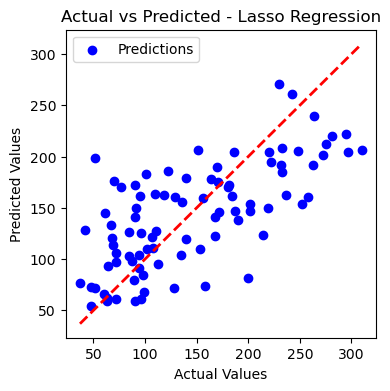

Model: Random Forest Regression
Train R^2: 0.9242
Test R^2: 0.4428
Test RMSE: 54.3324
----------------------------------------


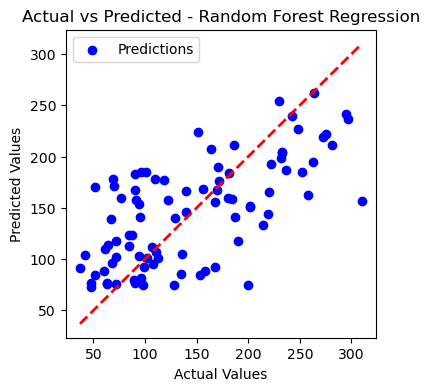

In [15]:
# 1. Linear Regression
linear_reg = LinearRegression()
evaluate_model(linear_reg, X_train, X_test, y_train, y_test, 'Linear Regression')

# 2. Ridge Regression
ridge_reg = Ridge(alpha=1.0)
evaluate_model(ridge_reg, X_train, X_test, y_train, y_test, 'Ridge Regression')

# 3. Lasso Regression
lasso_reg = Lasso(alpha=0.1)
evaluate_model(lasso_reg, X_train, X_test, y_train, y_test, 'Lasso Regression')

# 4. Random Forest Regression
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
evaluate_model(rf_reg, X_train, X_test, y_train, y_test, 'Random Forest Regression')

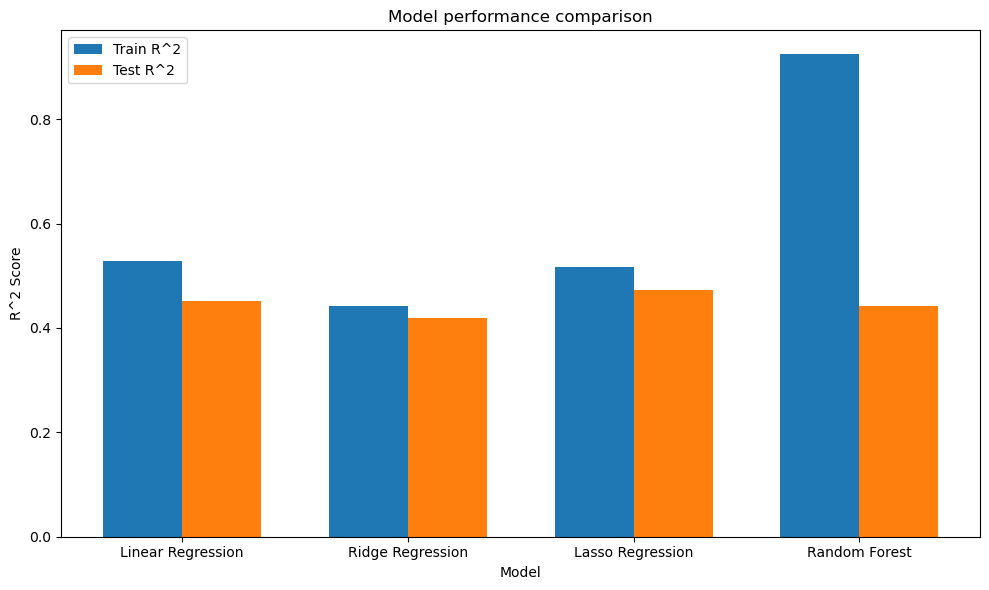

In [16]:
# Model comparison based on R^2 score for training and testing sets
models = ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Random Forest']
train_scores = [
    r2_score(y_train, linear_reg.predict(X_train)),
    r2_score(y_train, ridge_reg.predict(X_train)),
    r2_score(y_train, lasso_reg.predict(X_train)),
    r2_score(y_train, rf_reg.predict(X_train))
]
test_scores = [
    r2_score(y_test, linear_reg.predict(X_test)),
    r2_score(y_test, ridge_reg.predict(X_test)),
    r2_score(y_test, lasso_reg.predict(X_test)),
    r2_score(y_test, rf_reg.predict(X_test))
]

# Bar plot comparing R^2 score for all models
fig, ax = plt.subplots(figsize=(10, 6))
index = np.arange(len(models))
bar_width = 0.35

bar1 = ax.bar(index, train_scores, bar_width, label='Train R^2')
bar2 = ax.bar(index + bar_width, test_scores, bar_width, label='Test R^2')

ax.set_xlabel('Model')
ax.set_ylabel('R^2 Score')
ax.set_title('Model performance comparison')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(models)
ax.legend()

plt.tight_layout()
plt.show()

## Other example, discrete target?

In [17]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [18]:
# Load the wine quality dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(url, sep=';')

# Display the first few rows of the dataset
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


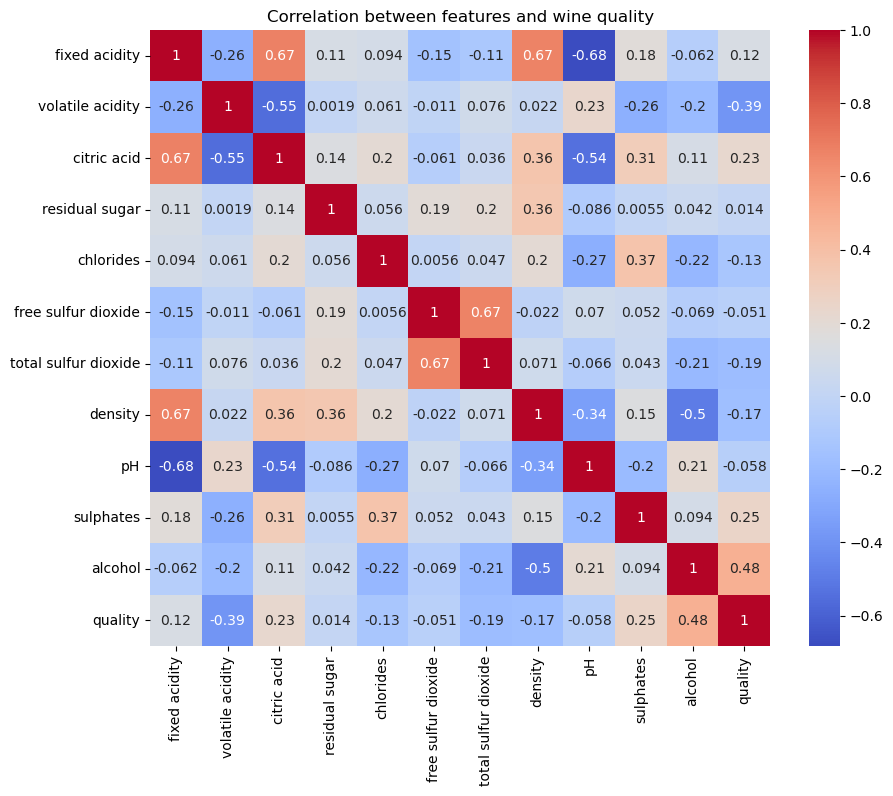

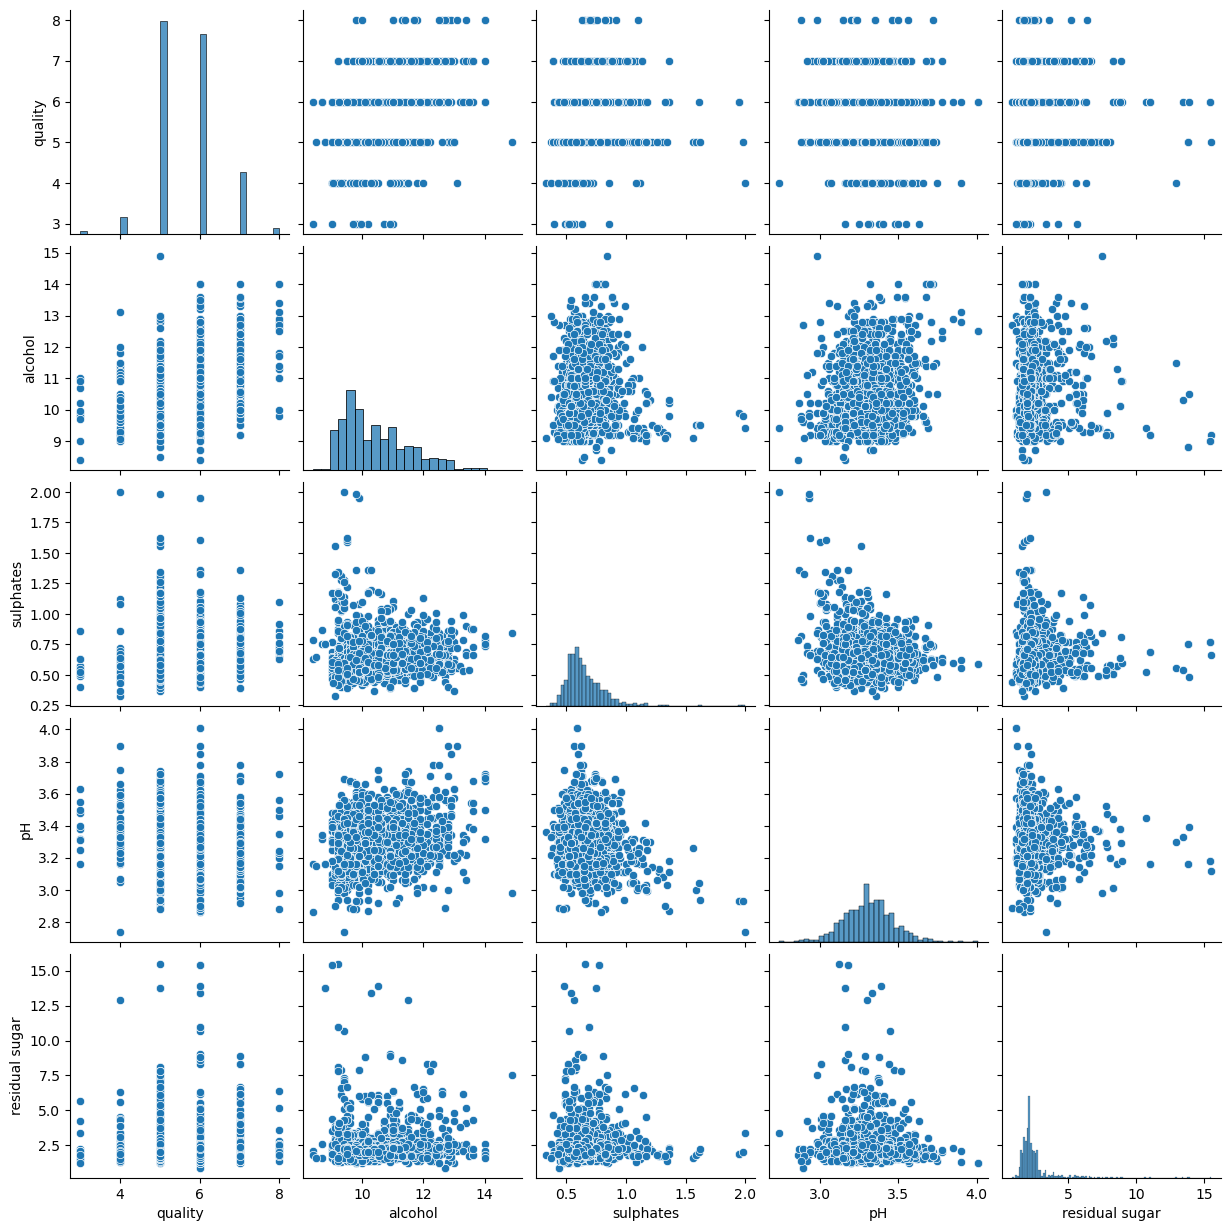

In [19]:
# Check for missing values
data.isnull().sum()

# Descriptive statistics
data.describe()

# Correlation heatmap to explore relationships between features and the target
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between features and wine quality')
plt.show()

# Pairplot to visualize relationships between important features and quality
sns.pairplot(data[['quality', 'alcohol', 'sulphates', 'pH', 'residual sugar']])
plt.show()

In [20]:
# Define features (X) and target (y)
X = data.drop('quality', axis=1)
y = data['quality']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Function to evaluate models and visualize results
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    print(f'Model: {model_name}')
    print(f'Train R^2: {r2_score(y_train, y_pred_train):.4f}')
    print(f'Test R^2: {r2_score(y_test, y_pred_test):.4f}')
    print(f'Test RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test)):.4f}')
    print('-'*40)
    
    # Plot the actual vs predicted values
    plt.figure(figsize=(6, 6))
    plt.scatter(y_test, y_pred_test, label='Predictions', color='blue')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Actual vs Predicted - {model_name}')
    plt.legend()
    plt.show()

Model: Linear Regression
Train R^2: 0.3480
Test R^2: 0.4032
Test RMSE: 0.6245
----------------------------------------


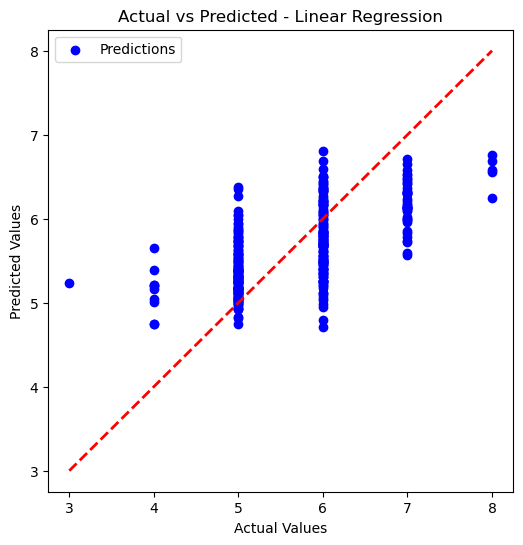

Model: Ridge Regression
Train R^2: 0.3469
Test R^2: 0.3987
Test RMSE: 0.6269
----------------------------------------


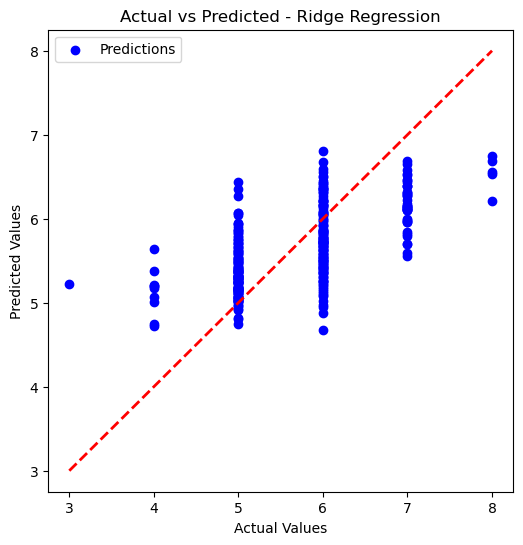

Model: Lasso Regression
Train R^2: 0.2365
Test R^2: 0.2369
Test RMSE: 0.7062
----------------------------------------


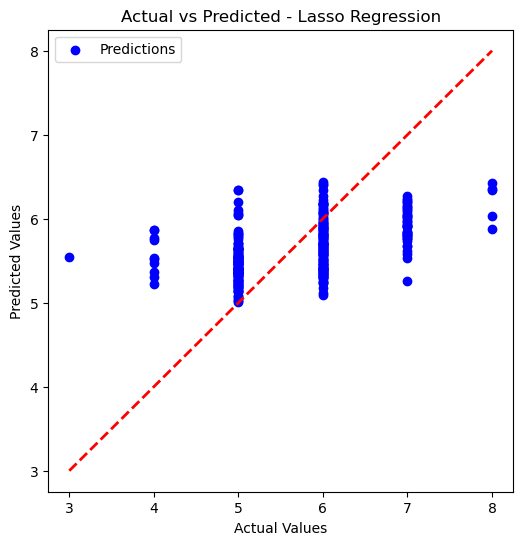

Model: Random Forest Regression
Train R^2: 0.9266
Test R^2: 0.5390
Test RMSE: 0.5489
----------------------------------------


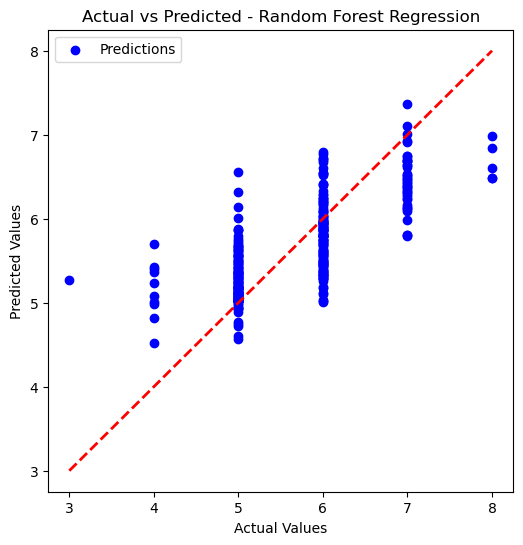

In [22]:
# 1. Linear Regression
linear_reg = LinearRegression()
evaluate_model(linear_reg, X_train, X_test, y_train, y_test, 'Linear Regression')

# 2. Ridge Regression
ridge_reg = Ridge(alpha=1.0)
evaluate_model(ridge_reg, X_train, X_test, y_train, y_test, 'Ridge Regression')

# 3. Lasso Regression
lasso_reg = Lasso(alpha=0.1)
evaluate_model(lasso_reg, X_train, X_test, y_train, y_test, 'Lasso Regression')

# 4. Random Forest Regression
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
evaluate_model(rf_reg, X_train, X_test, y_train, y_test, 'Random Forest Regression')

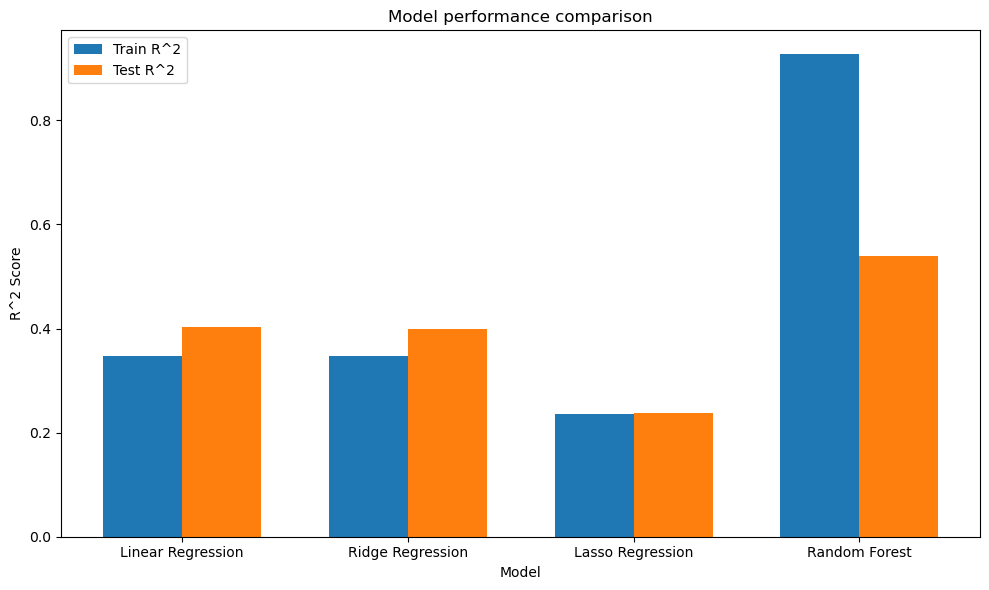

In [23]:
# Compare model performance based on R^2 scores for training and testing sets
models = ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Random Forest']
train_scores = [
    r2_score(y_train, linear_reg.predict(X_train)),
    r2_score(y_train, ridge_reg.predict(X_train)),
    r2_score(y_train, lasso_reg.predict(X_train)),
    r2_score(y_train, rf_reg.predict(X_train))
]
test_scores = [
    r2_score(y_test, linear_reg.predict(X_test)),
    r2_score(y_test, ridge_reg.predict(X_test)),
    r2_score(y_test, lasso_reg.predict(X_test)),
    r2_score(y_test, rf_reg.predict(X_test))
]

# Bar plot comparing R^2 score for all models
fig, ax = plt.subplots(figsize=(10, 6))
index = np.arange(len(models))
bar_width = 0.35

bar1 = ax.bar(index, train_scores, bar_width, label='Train R^2')
bar2 = ax.bar(index + bar_width, test_scores, bar_width, label='Test R^2')

ax.set_xlabel('Model')
ax.set_ylabel('R^2 Score')
ax.set_title('Model performance comparison')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(models)
ax.legend()

plt.tight_layout()
plt.show()

## Linear Regression vs. Multivariate Regression

Difference between **Linear Regression** and **Multivariate Regression** using the **Wine Quality** dataset. Both types of regression are widely used for predictive modeling but differ in the number of predictors (features) used.

### Key Differences:
- **Linear Regression**: Models the relationship between a single independent variable and the dependent variable.
- **Multivariate Regression**: Models the relationship between multiple independent variables and the dependent variable.

# Linear Regression (Univariate)

Linear Regression is a simple model where only one feature (independent variable) is used to predict a single target (dependent variable). The relationship is represented by a straight line and assumes a linear relationship between the feature and the target.

For example, we can use **alcohol content** to predict the wine quality. The formula for Linear Regression is:

\[
\text{quality} = \beta_0 + \beta_1 \times \text{alcohol}
\]

Where:
- \( \beta_0 \) is the intercept (where the line crosses the y-axis).
- \( \beta_1 \) is the coefficient (or weight) for the alcohol feature.

In [24]:
# Example code: Linear Regression with one feature (alcohol)
X_uni = data[['alcohol']]
y = data['quality']
X_train, X_test, y_train, y_test = train_test_split(X_uni, y, test_size=0.2, random_state=42)

linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred = linear_reg.predict(X_test)

print(f'R^2: {r2_score(y_test, y_pred)}')


R^2: 0.23561797203963364


### Multivariate Regression

In Multivariate Regression, we predict the target variable using multiple features instead of just one. This helps capture the complex relationships between multiple factors that influence the outcome. The formula for Multivariate Regression is:

\[
\text{quality} = \beta_0 + \beta_1 \times \text{alcohol} + \beta_2 \times \text{sulphates} + \dots + \beta_n \times \text{feature}_n
\]

Each feature \( \text{feature}_n \) contributes to the prediction, with corresponding coefficients \( \beta_n \) that represent the importance of each feature in determining the target value.


In [25]:
# Example code: Multivariate Regression with multiple features
X_multi = data.drop('quality', axis=1)
y = data['quality']
X_train, X_test, y_train, y_test = train_test_split(X_multi, y, test_size=0.2, random_state=42)

linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred = linear_reg.predict(X_test)

print(f'R^2: {r2_score(y_test, y_pred)}')


R^2: 0.4031803412796232


### Visual Representation of Linear vs. Multivariate Regression

- **Linear Regression**: The relationship between the predictor and the target is represented as a straight line in 2D space.
- **Multivariate Regression**: The relationship is modeled in multi-dimensional space, but we cannot visualize it in 2D. Instead, we can think of it as a hyperplane in n-dimensional space (where \( n \) is the number of features).

In practice, Multivariate Regression often leads to better predictions when multiple factors contribute to the outcome.


## Conclusion

The key difference between **Linear Regression** and **Multivariate Regression** lies in the number of features used:
- **Linear Regression** involves just one feature to predict the target.
- **Multivariate Regression** uses multiple features to predict the target, which generally improves the prediction accuracy.

Multivariate Regression is especially useful in real-world datasets where several factors influence the outcome, as in the case of wine quality, where many physicochemical properties affect the final quality rating.